## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [14]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.read_csv('Walmart_FB_2014_2017.csv', index_col='Date')

In [15]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.60642623, 0.39357377])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.11528185264762089)

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.028613503244092307)

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.16915526371973266)

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [19]:
pf_returns = []
pf_volatilities = []


2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [20]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([np.float64(0.1265099502801032),
  np.float64(0.17077283673444402),
  np.float64(0.21650161141757066),
  np.float64(0.13530452057714912),
  np.float64(0.14594011169911078),
  np.float64(0.05422284574011515),
  np.float64(0.2254068527992723),
  np.float64(0.11661710411781222),
  np.float64(0.1995187753172664),
  np.float64(0.04448222150096031),
  np.float64(0.21526950171122547),
  np.float64(0.057409550521357225),
  np.float64(0.2766820697160011),
  np.float64(0.06332413137692514),
  np.float64(0.22995400807027547),
  np.float64(0.23373497798830414),
  np.float64(0.24547186711402097),
  np.float64(0.13328783308859632),
  np.float64(0.021797047079287014),
  np.float64(0.09611710724514136),
  np.float64(0.022413326473042477),
  np.float64(0.12361240224525571),
  np.float64(0.1574765895239369),
  np.float64(0.10306352454890318),
  np.float64(0.13916085973827813),
  np.float64(0.1675091691347516),
  np.float64(0.1154066253134492),
  np.float64(0.2709049727088198),
  np.float64(0.1581085593

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [21]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.12650995, 0.17077284, 0.21650161, 0.13530452, 0.14594011,
        0.05422285, 0.22540685, 0.1166171 , 0.19951878, 0.04448222,
        0.2152695 , 0.05740955, 0.27668207, 0.06332413, 0.22995401,
        0.23373498, 0.24547187, 0.13328783, 0.02179705, 0.09611711,
        0.02241333, 0.1236124 , 0.15747659, 0.10306352, 0.13916086,
        0.16750917, 0.11540663, 0.27090497, 0.15810856, 0.06871063,
        0.03441538, 0.16120796, 0.14926588, 0.17947924, 0.01895182,
        0.13558862, 0.16394155, 0.15521888, 0.2336042 , 0.06080069,
        0.06157772, 0.19775586, 0.0057283 , 0.08778031, 0.03600986,
        0.12844046, 0.10554988, 0.23048556, 0.15645989, 0.01785592,
        0.11800529, 0.01907502, 0.09956843, 0.21755882, 0.13480202,
        0.17628761, 0.15823455, 0.16122245, 0.18231697, 0.19300335,
        0.21874409, 0.18808378, 0.19379321, 0.16212398, 0.27395976,
        0.14392251, 0.17395101, 0.07813042, 0.26883515, 0.13422949,
        0.16980088, 0.10255762, 0.1148831 , 0.14

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [22]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

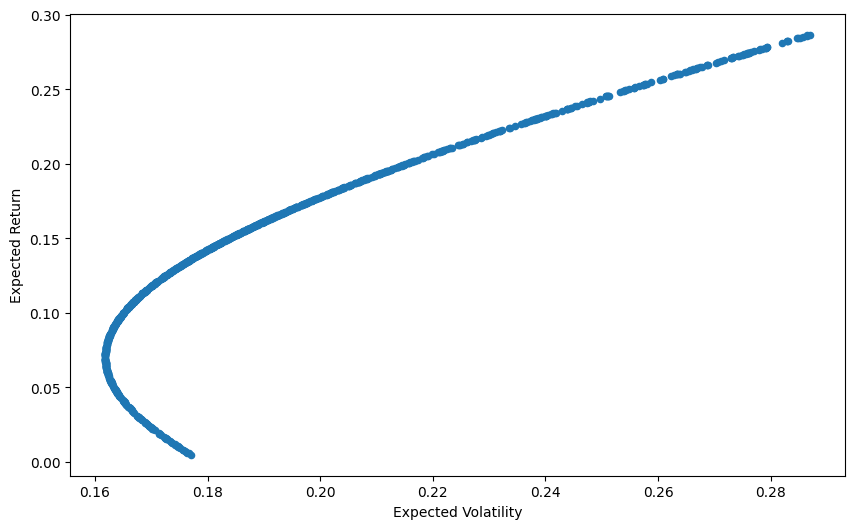

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [24]:
assets = ['WMT', 'FB','BP']
pf_data = pd.read_csv('WMT_FB_BP_2014_2017.csv', index_col='Date')
pf_data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


In [25]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.15441744, 0.63176118, 0.21382138])

Expected Portfolio Return:

In [26]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.20260701894657548)

Expected Portfolio Variance:

In [27]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.038662907490086273)

Expected Portfolio Volatility:

In [28]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.1966288572160411)

*****

In [29]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.0568257 , 0.12456039, 0.15290975, 0.22429105, 0.15549027,
        0.05344672, 0.12383863, 0.16026648, 0.19576009, 0.06592561,
        0.12775797, 0.09091621, 0.10898461, 0.14110494, 0.09411692,
        0.12308666, 0.07351655, 0.10929679, 0.07663336, 0.12461821,
        0.12926052, 0.09992775, 0.217159  , 0.18622746, 0.12388373,
        0.1020039 , 0.18815455, 0.03211217, 0.03846469, 0.13556606,
        0.06724226, 0.08135582, 0.1190207 , 0.15973574, 0.11842752,
        0.18804094, 0.14700673, 0.16253209, 0.17465969, 0.10362949,
        0.07530434, 0.16347778, 0.20875224, 0.11502755, 0.17010429,
        0.20854188, 0.19950073, 0.0814598 , 0.11743712, 0.10909908,
        0.09052753, 0.15894192, 0.0779213 , 0.09004453, 0.19557829,
        0.1802074 , 0.06447685, 0.24902017, 0.05865455, 0.16033251,
        0.17259294, 0.14703299, 0.1808496 , 0.12679415, 0.15889264,
        0.12487847, 0.11042017, 0.16149516, 0.08079268, 0.1547193 ,
        0.13192033, 0.19045368, 0.08984098, 0.13

In [30]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

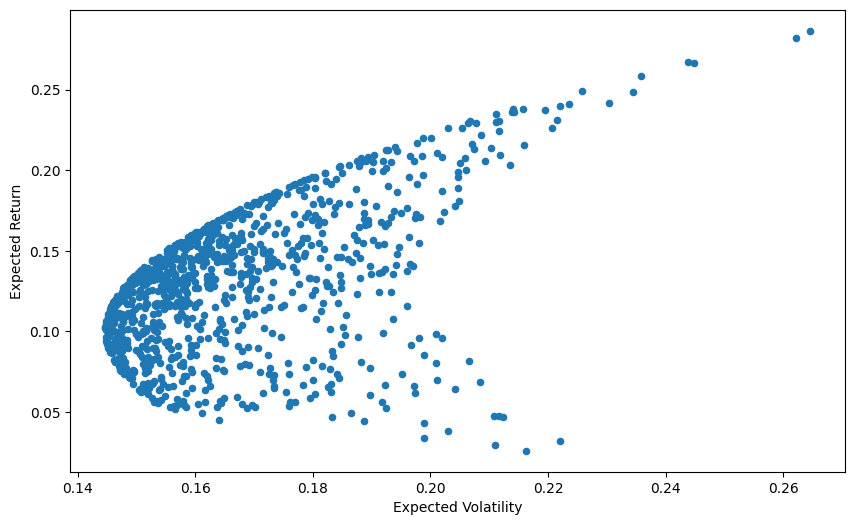

In [31]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')